In [1]:
import scipy.ndimage as ndimage
import scipy.misc as misc

raw = misc.imread('C:\\Users\\Shyam\\Downloads\\images.for.lesson.8\\objects.png')

print raw
img = ndimage.gaussian_filter(raw, 0.5)
thres = img > img.mean()
print img.mean()
misc.imsave('C:\\Users\\Shyam\\Downloads\\images.for.lesson.8\\objects_new.png',thres)
image_text = open("output_img.csv","w")
image_text.write(raw)
image_text.close()


SyntaxError: Missing parentheses in call to 'print' (<ipython-input-1-fac67d4757f8>, line 6)

In [14]:
import numpy as np
import matplotlib.pyplot as mpl
import scipy.ndimage as ndimage
import skimage.filters as skif
# Generating data points with a non-uniform background
x = np.random.uniform(low=0, high=100, size=20).astype(int)
y = np.random.uniform(low=0, high=100, size=20).astype(int)

# Creating image with non-uniform background
func = lambda x, y: x**2 + y**2
grid_x, grid_y = np.mgrid[-1:1:100j, -2:2:100j]
bkg = func(grid_x, grid_y)
bkg = bkg / np.max(bkg)
# Creating points
clean = np.zeros((100,100))
clean[(x,y)] += 5
clean = ndimage.gaussian_filter(clean, 3)
clean = clean / np.max(clean)
# Combining both the non-uniform background
# and points
fimg = bkg + clean
fimg = fimg / np.max(fimg)
# Defining minimum neighboring size of objects
block_size = 3
# Adaptive threshold function which returns image
# map of structures that are different relative to
# background
adaptive_cut = skif.threshold_adaptive(fimg, block_size, offset=0)
# Global threshold
global_thresh = skif.threshold_otsu(fimg)
global_cut = fimg > global_thresh
# Creating figure to highlight difference between
# adaptive and global threshold methods
fig = mpl.figure(figsize=(8, 4))
fig.subplots_adjust(hspace=0.05, wspace=0.05)
ax1 = fig.add_subplot(131)
ax1.imshow(fimg)
ax1.xaxis.set_visible(False)
ax1.yaxis.set_visible(False)
ax2 = fig.add_subplot(132)
ax2.imshow(global_cut)
ax2.xaxis.set_visible(False)
ax2.yaxis.set_visible(False)
ax3 = fig.add_subplot(133)
ax3.imshow(adaptive_cut)
ax3.xaxis.set_visible(False)
ax3.yaxis.set_visible(False)

fig.savefig('scikit_image_f01.pdf', bbox_inches='tight')

In [16]:
x = np.random.uniform(low=0, high=100, size=20).astype(int)
y = np.random.uniform(low=0, high=100, size=20).astype(int)

print x

[59 72 19 83 18 50  2 44 60 35 74  7 58 90 16 24 75 43 74 70]


In [18]:
# Creating image with non-uniform background
func = lambda x, y: x**2 + y**2
grid_x, grid_y = np.mgrid[-1:1:100j, -2:2:100j]
print grid_x, grid_y

bkg = func(grid_x, grid_y)
bkg = bkg / np.max(bkg)

[[-1.         -1.         -1.         ..., -1.         -1.         -1.        ]
 [-0.97979798 -0.97979798 -0.97979798 ..., -0.97979798 -0.97979798
  -0.97979798]
 [-0.95959596 -0.95959596 -0.95959596 ..., -0.95959596 -0.95959596
  -0.95959596]
 ..., 
 [ 0.95959596  0.95959596  0.95959596 ...,  0.95959596  0.95959596
   0.95959596]
 [ 0.97979798  0.97979798  0.97979798 ...,  0.97979798  0.97979798
   0.97979798]
 [ 1.          1.          1.         ...,  1.          1.          1.        ]] [[-2.         -1.95959596 -1.91919192 ...,  1.91919192  1.95959596  2.        ]
 [-2.         -1.95959596 -1.91919192 ...,  1.91919192  1.95959596  2.        ]
 [-2.         -1.95959596 -1.91919192 ...,  1.91919192  1.95959596  2.        ]
 ..., 
 [-2.         -1.95959596 -1.91919192 ...,  1.91919192  1.95959596  2.        ]
 [-2.         -1.95959596 -1.91919192 ...,  1.91919192  1.95959596  2.        ]
 [-2.         -1.95959596 -1.91919192 ...,  1.91919192  1.95959596  2.        ]]


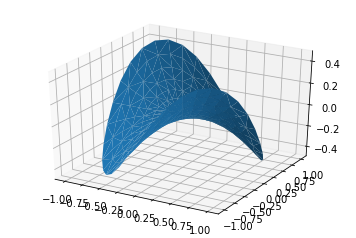

In [20]:
'''
======================
Triangular 3D surfaces
======================

Plot a 3D surface with a triangular mesh.
'''

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


n_radii = 8
n_angles = 36

# Make radii and angles spaces (radius r=0 omitted to eliminate duplication).
radii = np.linspace(0.125, 1.0, n_radii)
angles = np.linspace(0, 2*np.pi, n_angles, endpoint=False)

# Repeat all angles for each radius.
angles = np.repeat(angles[..., np.newaxis], n_radii, axis=1)

# Convert polar (radii, angles) coords to cartesian (x, y) coords.
# (0, 0) is manually added at this stage,  so there will be no duplicate
# points in the (x, y) plane.
x = np.append(0, (radii*np.cos(angles)).flatten())
y = np.append(0, (radii*np.sin(angles)).flatten())

# Compute z to make the pringle surface.
z = np.sin(-x*y)

fig = plt.figure()
ax = fig.gca(projection='3d')

ax.plot_trisurf(x, y, z, linewidth=0.2, antialiased=True)

plt.show()

In [22]:
?plt.plot